# Introduction

# Setup

In [134]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from EconModel import EconModelClass, jit  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exercises

## Simulation

In [135]:
from ConSavModel import ConSavModelClass
model = ConSavModelClass()

model.solve(do_print=True,algo='egm')

iteration    0 solved in 1.4 secs [max abs. diff. in c 5.02e+01]
iteration    1 solved in 0.0 secs [max abs. diff. in c 1.68e+01]
iteration    2 solved in 0.0 secs [max abs. diff. in c 8.39e+00]
iteration    3 solved in 0.0 secs [max abs. diff. in c 5.04e+00]
iteration    4 solved in 0.0 secs [max abs. diff. in c 3.36e+00]
iteration    5 solved in 0.0 secs [max abs. diff. in c 2.40e+00]
iteration    6 solved in 0.0 secs [max abs. diff. in c 1.80e+00]
iteration    7 solved in 0.0 secs [max abs. diff. in c 1.40e+00]
iteration    8 solved in 0.0 secs [max abs. diff. in c 1.12e+00]
iteration    9 solved in 0.0 secs [max abs. diff. in c 9.20e-01]
iteration  100 solved in 0.0 secs [max abs. diff. in c 3.44e-03]
iteration  200 solved in 0.0 secs [max abs. diff. in c 3.38e-06]
iteration  271 solved in 0.0 secs [max abs. diff. in c 9.54e-09]
model solved in 1.6 secs


In [136]:
par = model.par
np.random.choice(par.xi,(par.simN,par.simT),p=par.xi_w)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

model prepared for simulation in 3.4 secs
model simulated in 4.0 secs


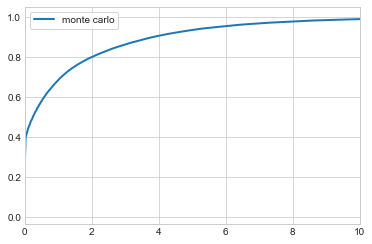

In [137]:
def plot_a_cdf(model):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    model.prepare_simulate(algo='mc')
    model.simulate(algo='mc')
    par = model.par

    CDF_mc = np.zeros(par.Na)
    for i_a in range(par.Na):
        CDF_mc[i_a] = np.sum(model.sim.a[-1,:] < par.a_grid[i_a])/par.simN

    ax.plot(par.a_grid,CDF_mc,lw=2,label='monte carlo')


    ax.set_xlim([-par.b,10.0])
    ax.legend(frameon=True);


plot_a_cdf(model)
    

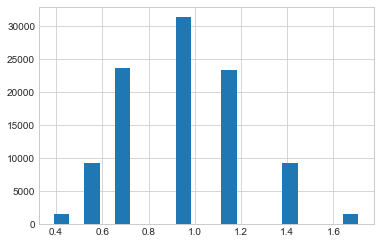

In [138]:
# The seven possible wage shocks
plt.hist(model.sim.c[0,:], bins=20)
plt.show()

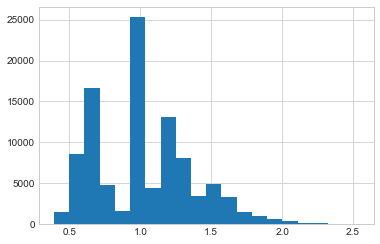

In [139]:
plt.hist(model.sim.c[-1,:], bins=20)
plt.show()

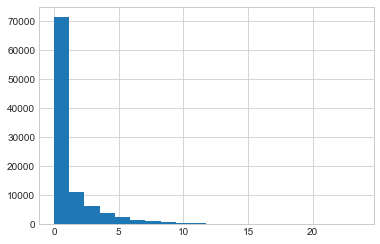

In [140]:
plt.hist(model.sim.a[-1,:], bins=20)
plt.show()

## Allow for borrowing 

In [141]:
from ConSavModel import ConSavModelClass

In [142]:
model = ConSavModelClass(par={'b':0.1})

In [143]:
model.solve(do_print=True,algo='egm')

iteration    0 solved in 3.0 secs [max abs. diff. in c 5.03e+01]
iteration    1 solved in 0.0 secs [max abs. diff. in c 1.68e+01]
iteration    2 solved in 0.0 secs [max abs. diff. in c 8.39e+00]
iteration    3 solved in 0.0 secs [max abs. diff. in c 5.04e+00]
iteration    4 solved in 0.0 secs [max abs. diff. in c 3.36e+00]
iteration    5 solved in 0.0 secs [max abs. diff. in c 2.40e+00]
iteration    6 solved in 0.0 secs [max abs. diff. in c 1.81e+00]
iteration    7 solved in 0.0 secs [max abs. diff. in c 1.41e+00]
iteration    8 solved in 0.0 secs [max abs. diff. in c 1.13e+00]
iteration    9 solved in 0.0 secs [max abs. diff. in c 9.21e-01]
iteration  100 solved in 0.0 secs [max abs. diff. in c 3.45e-03]
iteration  200 solved in 0.0 secs [max abs. diff. in c 3.45e-06]
iteration  271 solved in 0.0 secs [max abs. diff. in c 9.77e-09]
model solved in 3.2 secs


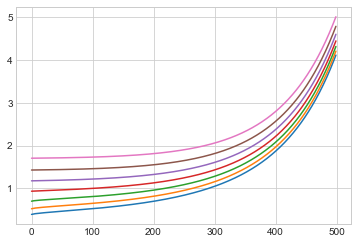

In [144]:
plt.plot(model.sol.c[:,0,:].T);

In [145]:
#model.solve(algo='egm')
#print(np.mean(model.sol.c))

In [146]:
#plt.plot(model.sol.c.T);

model prepared for simulation in 3.7 secs
model simulated in 3.3 secs


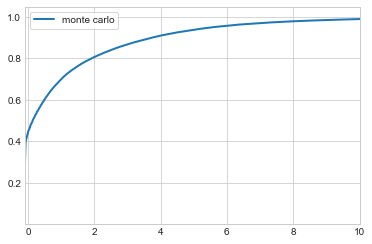

In [147]:

plot_a_cdf(model)

In [148]:
model_borrow = model.copy()
model_borrow.par.b= 10.
model_borrow.allocate()
model_borrow.solve(do_print=True,algo='egm')

iteration    0 solved in 0.0 secs [max abs. diff. in c 5.53e+01]
iteration    1 solved in 0.0 secs [max abs. diff. in c 1.84e+01]
iteration    2 solved in 0.0 secs [max abs. diff. in c 9.22e+00]
iteration    3 solved in 0.0 secs [max abs. diff. in c 5.54e+00]
iteration    4 solved in 0.0 secs [max abs. diff. in c 3.70e+00]
iteration    5 solved in 0.0 secs [max abs. diff. in c 2.64e+00]
iteration    6 solved in 0.0 secs [max abs. diff. in c 1.98e+00]
iteration    7 solved in 0.0 secs [max abs. diff. in c 1.54e+00]
iteration    8 solved in 0.0 secs [max abs. diff. in c 1.24e+00]
iteration    9 solved in 0.0 secs [max abs. diff. in c 1.01e+00]
iteration  100 solved in 0.0 secs [max abs. diff. in c 4.36e-03]
iteration  200 solved in 0.0 secs [max abs. diff. in c 1.99e-05]
iteration  300 solved in 0.0 secs [max abs. diff. in c 1.25e-08]
iteration  303 solved in 0.0 secs [max abs. diff. in c 9.99e-09]
model solved in 0.3 secs


model prepared for simulation in 2.8 secs
model simulated in 1.5 secs


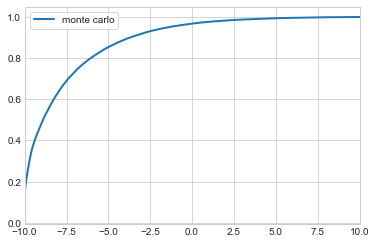

In [149]:

plot_a_cdf(model_borrow)

In [150]:
model_borrow.sim.a[0,:].shape

(100000,)

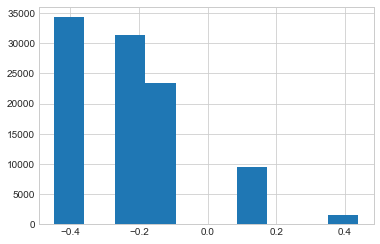

In [151]:
plt.hist(model_borrow.sim.a[0,:], bins=10)
plt.show()

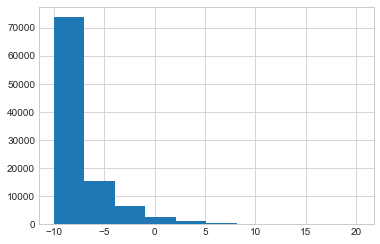

In [152]:
plt.hist(model_borrow.sim.a[-1,:], bins=10)
plt.show()

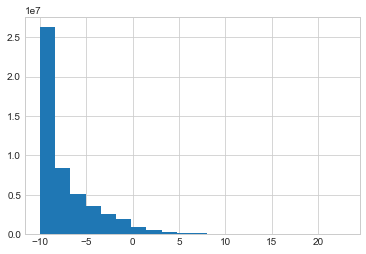

In [153]:
plt.hist(model_borrow.sim.a.flatten(), bins=20)
plt.show()

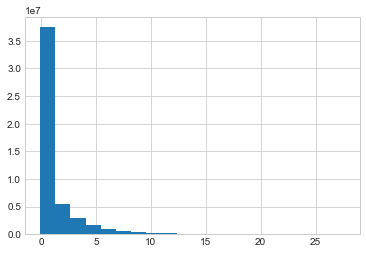

In [154]:
plt.hist(model.sim.a.flatten(), bins=20)
plt.show()

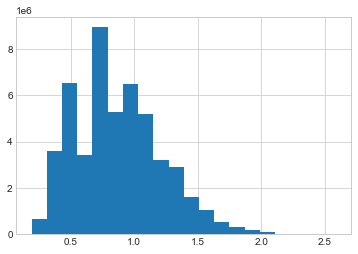

In [155]:
plt.hist(model_borrow.sim.c.flatten(), bins=20)
plt.show()

In [156]:
## Most people live with the least amount of wealth possible, and when borrowing is possible the move to the borrowing limit, increasing the rate of interest adjusts this somewhat

model_b_highr = model.copy()
model_b_highr.par.b= 10.
model_b_highr.par.r= .03
model_b_highr.allocate()
model_b_highr.solve(do_print=True,algo='egm')

iteration    0 solved in 0.0 secs [max abs. diff. in c 5.57e+01]
iteration    1 solved in 0.0 secs [max abs. diff. in c 1.86e+01]
iteration    2 solved in 0.0 secs [max abs. diff. in c 9.29e+00]
iteration    3 solved in 0.0 secs [max abs. diff. in c 5.58e+00]
iteration    4 solved in 0.0 secs [max abs. diff. in c 3.72e+00]
iteration    5 solved in 0.0 secs [max abs. diff. in c 2.66e+00]
iteration    6 solved in 0.0 secs [max abs. diff. in c 2.00e+00]
iteration    7 solved in 0.0 secs [max abs. diff. in c 1.56e+00]
iteration    8 solved in 0.0 secs [max abs. diff. in c 1.25e+00]
iteration    9 solved in 0.0 secs [max abs. diff. in c 1.02e+00]
iteration  100 solved in 0.0 secs [max abs. diff. in c 4.24e-03]
iteration  200 solved in 0.0 secs [max abs. diff. in c 9.15e-05]
iteration  300 solved in 0.0 secs [max abs. diff. in c 1.35e-06]
iteration  400 solved in 0.0 secs [max abs. diff. in c 9.50e-09]
model solved in 0.7 secs


model prepared for simulation in 4.3 secs
model simulated in 2.1 secs
model prepared for simulation in 3.4 secs
model simulated in 2.1 secs


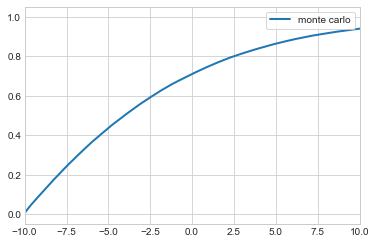

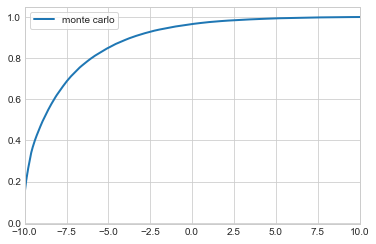

In [157]:
plot_a_cdf(model_b_highr)
plot_a_cdf(model_borrow)

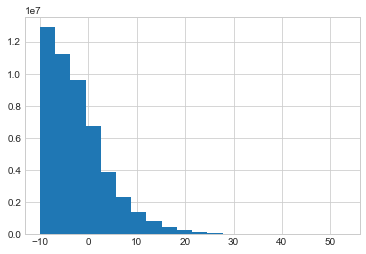

In [158]:
plt.hist(model_b_highr.sim.a.flatten(), bins=20)
plt.show()

### Introducing shocks

In [159]:
model_shock = model.copy()
model_shock.par.sigma_xi = .1
model_shock.par.Nxi = 5
model_shock.allocate()

In [160]:
model_shock.solve(do_print=True,algo='vfi')

iteration    0 solved in 21.4 secs [max abs. diff. in c 5.04e+01]
iteration    1 solved in 0.9 secs [max abs. diff. in c 1.69e+01]
iteration    2 solved in 0.8 secs [max abs. diff. in c 8.52e+00]
iteration    3 solved in 0.8 secs [max abs. diff. in c 5.14e+00]
iteration    4 solved in 0.9 secs [max abs. diff. in c 3.48e+00]
iteration    5 solved in 0.9 secs [max abs. diff. in c 2.48e+00]
iteration    6 solved in 0.8 secs [max abs. diff. in c 1.87e+00]
iteration    7 solved in 0.8 secs [max abs. diff. in c 1.46e+00]
iteration    8 solved in 0.7 secs [max abs. diff. in c 1.13e+00]
iteration    9 solved in 1.0 secs [max abs. diff. in c 9.27e-01]
iteration  100 solved in 0.3 secs [max abs. diff. in c 3.86e-03]
iteration  200 solved in 0.4 secs [max abs. diff. in c 1.17e-04]
iteration  226 solved in 0.3 secs [max abs. diff. in c 0.00e+00]
model solved in 1.0 mins 43 secs


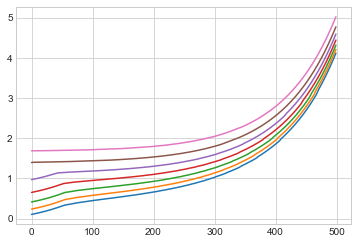

In [161]:
plt.plot(model_shock.sol.c[:,0,:].T);

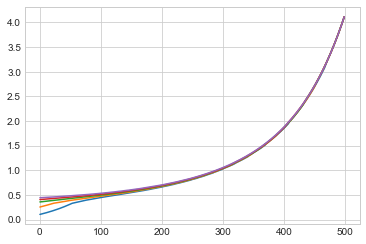

In [162]:
plt.plot(model_shock.sol.c[0,:,:].T);

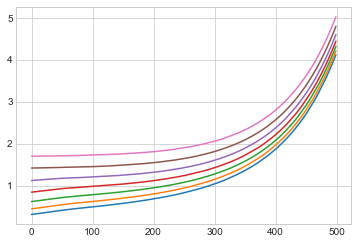

In [163]:
plt.plot(np.mean(model_shock.sol.c[:,:,:],axis=1).T);

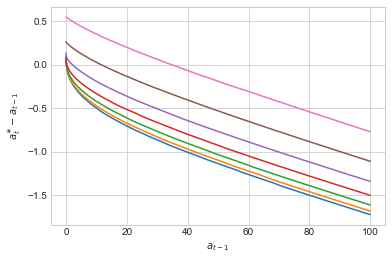

In [164]:
model_shock.plot_save_change()

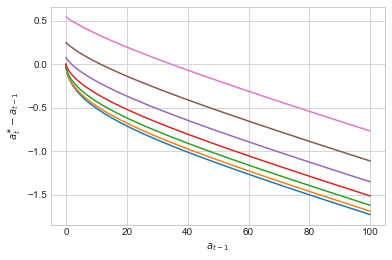

In [165]:
model.plot_save_change()

In [166]:
# savings increase with the shock
print(np.mean(model_shock.sol.a))
print(np.mean(model.sol.a))

print('consumption')
print(np.mean(model_shock.sol.c)) 
print(np.mean(model.sol.c))


16.17539635285989
16.16325920985157
consumption
1.6737916401471997
1.68592878315552


In [167]:
print("Response to shock is larger in savings than in consumption (smoothing)")
print(model_shock.par.xi)
print(np.mean(model_shock.sol.a,axis=(0,2)))
print(np.mean(model_shock.sol.c,axis=(0,2)))

Response to shock is larger in savings than in consumption (smoothing)
[-0.285697   -0.13556262  0.          0.13556262  0.285697  ]
[15.91495679 16.04807776 16.17265819 16.29998297 16.44130605]
[1.6485342  1.66554761 1.6765298  1.68476764 1.69357894]


In [168]:
# Savings is lower and consumption higher for the state where the shock is zero, (cautionary savings)
print(model.par.xi)
print(np.mean(model.sol.a,axis=(0,2)))
print(np.mean(model.sol.c,axis=(0,2)))

# If borrowing is adjusted 

[0.]
[16.16325921]
[1.68592878]


In [169]:
print(np.min(model.sol.c,axis=(0,2)))

[0.38926563]


model prepared for simulation in 2.2 secs
model simulated in 0.9 secs


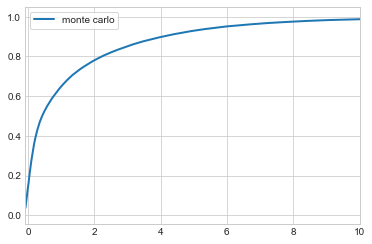

In [170]:
plot_a_cdf(model_shock)

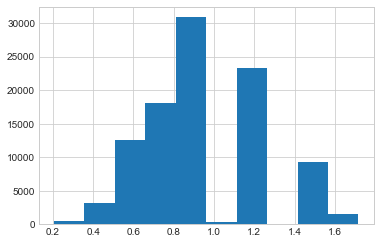

In [171]:
plt.hist(model_shock.sim.c[0,:], bins=10)
plt.show()

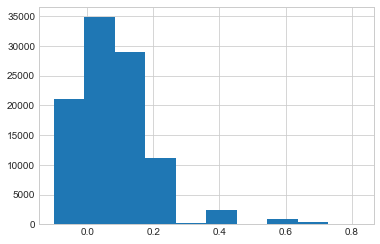

In [172]:
plt.hist(model_shock.sim.a[0,:], bins=10)
plt.show()

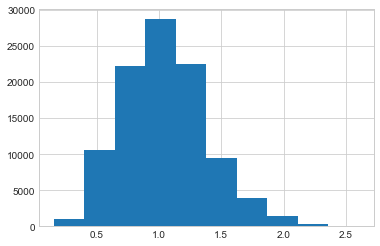

In [173]:
plt.hist(model_shock.sim.c[-1,:], bins=10)
plt.show()

### Increase std

In [174]:
## increase std
model_bshock = model.copy()
model_bshock.par.sigma_xi = .2

model_bshock.par.Nxi = 5

model_bshock.allocate()

In [175]:
# Shocks are so big there can be negative income in a given year ()
print(model_bshock.par.xi)
print(model_bshock.par.z_grid)
# Even if borrowing is adjusted to allow for this, you still have to check the case where people are on their borrowing limit, 
# and with low income and and worst chock the will only have negative consumption opportunities

[-0.571394   -0.27112524  0.          0.27112524  0.571394  ]
[0.39126563 0.52373855 0.70106355 0.93842643 1.25615454 1.68145758
 2.25075777]


In [176]:
# I set nxi= 1 to allow to have sigma_xi (with larger grid )
model_bshock.par.Nxi = 3

model_bshock.allocate()
print(model_bshock.par.xi)
print(model_bshock.par.z_grid)

[-0.34641016  0.          0.34641016]
[0.39126563 0.52373855 0.70106355 0.93842643 1.25615454 1.68145758
 2.25075777]


In [177]:
model_bshock.solve(do_print=True,algo='vfi')

iteration    0 solved in 0.3 secs [max abs. diff. in c 5.03e+01]
iteration    1 solved in 0.3 secs [max abs. diff. in c 1.69e+01]
iteration    2 solved in 0.2 secs [max abs. diff. in c 8.58e+00]
iteration    3 solved in 0.2 secs [max abs. diff. in c 5.13e+00]
iteration    4 solved in 0.2 secs [max abs. diff. in c 3.48e+00]
iteration    5 solved in 0.2 secs [max abs. diff. in c 2.48e+00]
iteration    6 solved in 0.2 secs [max abs. diff. in c 1.90e+00]
iteration    7 solved in 0.2 secs [max abs. diff. in c 1.46e+00]
iteration    8 solved in 0.2 secs [max abs. diff. in c 1.13e+00]
iteration    9 solved in 0.2 secs [max abs. diff. in c 9.89e-01]
iteration  100 solved in 0.2 secs [max abs. diff. in c 3.73e-03]
iteration  200 solved in 0.2 secs [max abs. diff. in c 1.16e-04]
iteration  228 solved in 0.2 secs [max abs. diff. in c 0.00e+00]
model solved in 46.3 secs


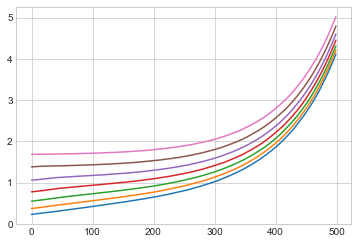

In [178]:
plt.plot(np.mean(model_bshock.sol.c[:,:,:],axis=1).T);

In [179]:
print("Larger std shock means even less consumption")
print(model_bshock.par.xi)
print(np.mean(model_bshock.sol.a,axis=(0,2)))
print(np.mean(model_bshock.sol.c,axis=(0,2)))

Larger std shock means even less consumption
[-0.34641016  0.          0.34641016]
[15.88137074 16.19402199 16.51742862]
[1.62140709 1.655166   1.67816953]


In [180]:
print("Response to shock is larger in savings than in consumption (smoothing)")
print(model_shock.par.xi)
print(np.mean(model_shock.sol.a,axis=(0,2)))
print(np.mean(model_shock.sol.c,axis=(0,2)))

Response to shock is larger in savings than in consumption (smoothing)
[-0.285697   -0.13556262  0.          0.13556262  0.285697  ]
[15.91495679 16.04807776 16.17265819 16.29998297 16.44130605]
[1.6485342  1.66554761 1.6765298  1.68476764 1.69357894]


In [181]:
# Also with nxi=3 with the smaller chock 

model_lshock = model.copy()
model_lshock.par.sigma_xi = .1
model_lshock.par.Nxi = 3
model_lshock.allocate()
model_lshock.solve(do_print=False,algo='vfi')
print(model_lshock.par.xi)
print(np.mean(model_lshock.sol.a,axis=(0,2)))
print(np.mean(model_lshock.sol.c,axis=(0,2)))

[-0.17320508  0.          0.17320508]
[16.01412932 16.17259876 16.33495301]
[1.66185359 1.67658923 1.68744006]


## Solving with vfi

In [182]:
model.solve(do_print=False,algo='vfi')
print(np.mean(model.sol.a,axis=(0,2)))
print(np.mean(model.sol.c,axis=(0,2)))

[16.16297137]
[1.68621663]


In [183]:
model.solve(do_print=True,algo='egm')

iteration    0 solved in 0.0 secs [max abs. diff. in c 5.03e+01]
iteration    1 solved in 0.0 secs [max abs. diff. in c 1.68e+01]
iteration    2 solved in 0.0 secs [max abs. diff. in c 8.39e+00]
iteration    3 solved in 0.0 secs [max abs. diff. in c 5.04e+00]
iteration    4 solved in 0.0 secs [max abs. diff. in c 3.36e+00]
iteration    5 solved in 0.0 secs [max abs. diff. in c 2.40e+00]
iteration    6 solved in 0.0 secs [max abs. diff. in c 1.81e+00]
iteration    7 solved in 0.0 secs [max abs. diff. in c 1.41e+00]
iteration    8 solved in 0.0 secs [max abs. diff. in c 1.13e+00]
iteration    9 solved in 0.0 secs [max abs. diff. in c 9.21e-01]
iteration  100 solved in 0.0 secs [max abs. diff. in c 3.45e-03]
iteration  200 solved in 0.0 secs [max abs. diff. in c 3.45e-06]
iteration  271 solved in 0.0 secs [max abs. diff. in c 9.77e-09]
model solved in 0.2 secs


In [184]:
print(np.mean(model.sol.a,axis=(0,2)))
print(np.mean(model.sol.c,axis=(0,2)))

[16.16325921]
[1.68592878]


In [185]:
model_bshock.solve(do_print=True,algo='vfi')

print(np.mean(model_bshock.sol.a,axis=(0,2)))
print(np.mean(model_bshock.sol.c,axis=(0,2)))
model_bshock.solve(do_print=True,algo='egm')
print(np.mean(model_bshock.sol.a,axis=(0,2)))
print(np.mean(model_bshock.sol.c,axis=(0,2)))

iteration    0 solved in 0.3 secs [max abs. diff. in c 5.03e+01]
iteration    1 solved in 0.3 secs [max abs. diff. in c 1.69e+01]
iteration    2 solved in 0.3 secs [max abs. diff. in c 8.58e+00]
iteration    3 solved in 0.3 secs [max abs. diff. in c 5.13e+00]
iteration    4 solved in 0.3 secs [max abs. diff. in c 3.48e+00]
iteration    5 solved in 0.3 secs [max abs. diff. in c 2.48e+00]
iteration    6 solved in 0.3 secs [max abs. diff. in c 1.90e+00]
iteration    7 solved in 0.3 secs [max abs. diff. in c 1.46e+00]
iteration    8 solved in 0.3 secs [max abs. diff. in c 1.13e+00]
iteration    9 solved in 0.3 secs [max abs. diff. in c 9.89e-01]
iteration  100 solved in 0.2 secs [max abs. diff. in c 3.73e-03]
iteration  200 solved in 0.2 secs [max abs. diff. in c 1.16e-04]
iteration  228 solved in 0.2 secs [max abs. diff. in c 0.00e+00]
model solved in 56.6 secs
[15.88137074 16.19402199 16.51742862]
[1.62140709 1.655166   1.67816953]
iteration    0 solved in 0.0 secs [max abs. diff. in c 5